In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def simulate(N):
    loops = np.zeros(N)
    for i in range(N):
        tie = random.randint(0,N-1)
        loops[tie] += 1
    return len(loops[loops != 0])

In [3]:
N = 1000
data = np.zeros(N)
for i in range(10000):
    num_cl =simulate(N)
    data[num_cl-1] += 1

In [4]:
def plot_bar(data):
    plt.figure(figsize=(12,6))
    plt.bar(range(1, len(data)+1), data, align='center')
    plt.xlabel('Number of closed string loops')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.grid(True)
    plt.show()

In [5]:
N = 10
data = []
for i in range(10000):
    data.append(simulate(N))

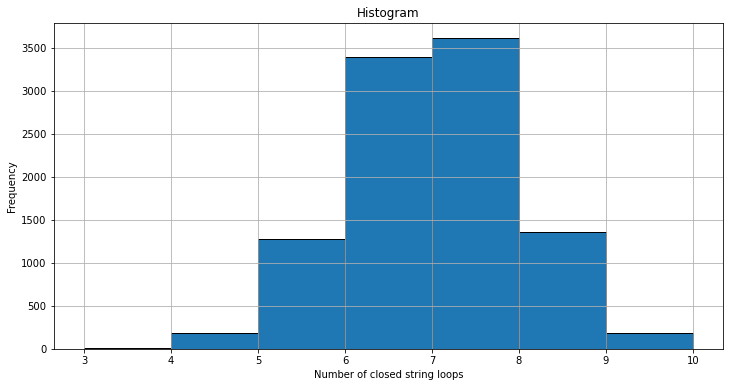

In [6]:
plt.figure(figsize=(12,6))
plt.hist(data, bins=range(min(data), max(data) + 1), edgecolor='black')
plt.xlabel('Number of closed string loops')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [7]:
def perm(n, k):
    return math.factorial(n) / math.factorial(n - k)

def unique(set_arr):
    ret = []
    for i in set_arr:
        if i not in ret:
            ret.append(i)
    return ret

def total_comb(N):
    loop_comb = np.zeros(N)
    current_P = [[]]
    loop_comb[-1] = 1
    for l in range(N - 1, N // 2, -1):
        
        # Construct set P
        next_P = []
        
        for i in range(len(current_P)):
            for j in np.unique(current_P[i]):
                C = current_P[i].copy()  # Copy the list to avoid mutation
                index = np.where(np.array(C) == j)[0][0]
                C[index] += 1
                next_P.append(C)
        
        item = current_P[-1].copy()  # Copy the list to avoid mutation
        item.append(2)
        next_P.append(item)
        current_P = unique(next_P)
        # Counting
        for C in current_P:
            prod = 2**(np.sum(C) - len(C))
            n = l
            for i in np.unique(C):
                C = np.array(C)
                k = len(C[C == i])
                prod *= perm(n, k)
                n -= len(C[C == i])
            loop_comb[l - 1] += prod
            
    #####################################################
    
    for l in range(N // 2, 0, -1):
        
        # Construct set P
        next_P = []
        
        for i in range(len(current_P)):
            for j in np.unique(current_P[i]):
                C = current_P[i].copy()  # Copy the list to avoid mutation
                index = np.where(np.array(C) == j)[0][0]
                C[index] += 1
                next_P.append(C)
        current_P = unique(next_P)
        current_P = [subarray for subarray in current_P if len(subarray) <=l]
        # Counting
        for C in current_P:
            prod = 2**(np.sum(C) - len(C))
            n = l
            for i in np.unique(C):
                C = np.array(C)
                k = len(C[C == i])
                prod *= perm(n, k)
                n -= len(C[C == i])
            loop_comb[l-1] += prod
        
    return loop_comb

def exp_val1(N):
    loop_comb = total_comb(N)
    sum = 0
    for i in range(len(loop_comb)):
        sum += (i+1) * loop_comb[i]
    return sum / np.sum(loop_comb)

def exp_val2(N):
    sum = 0
    for i in range(1,N+1):
        sum += 1/(2*i-1)
    return sum

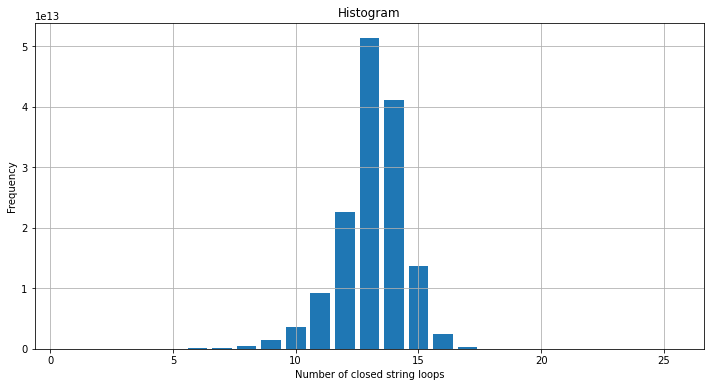

In [8]:
plot_bar(total_comb(25))

In [9]:
for n in range(3,8):
    print(f'Our Eq gives {exp_val1(n)}')
    print(f'Our sol gives {exp_val2(n)}')
    print('------------------------------------')

Our Eq gives 1.6666666666666667
Our sol gives 1.5333333333333332
------------------------------------
Our Eq gives 2.0
Our sol gives 1.676190476190476
------------------------------------
Our Eq gives 2.4193548387096775
Our sol gives 1.7873015873015872
------------------------------------
Our Eq gives 2.7345454545454544
Our sol gives 1.878210678210678
------------------------------------
Our Eq gives 3.234146341463415
Our sol gives 1.9551337551337549
------------------------------------


In [12]:
for n in range(3,8):
    print(f'counting gives {np.sum(total_comb(n))}')

counting gives 9.0
counting gives 23.0
counting gives 93.0
counting gives 275.0
counting gives 1025.0
